# Algoritmo K-means (Core)

El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset “Mall Customer Segmentation Data” de Kaggle.

Enlace al dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## Objetivo de la Actividad

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.


## Descripción del Algoritmo K-means

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

1. Asignación de clusters: Cada punto de datos se asigna al centroide más cercano.

2. Actualización de centroides: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.

# 1. Carga del Dataset:

  – El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
  
  – Utiliza el archivo “Mall_Customers.csv” y cárgalo en tu entorno de trabajo.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/5_Core_Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [2]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [3]:
df.duplicated().sum()

0

In [5]:
df.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


## Análisis

Se realizó la carga de datos y se verificó que no hubieran datos nulos o duplicados

# 2. Selección de Variables:

  – Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

In [13]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Verificar las dimensiones de los datos seleccionados
print("Dimensiones de X:", X.shape)

Dimensiones de X: (200, 2)


## Análisis

Se realizó la selección de las variables y esto se convirtió en un array ya que KMeans trabaja con arrays numéricos y no tanto con DataFrames, así se tiene que X tiene 200 filas y 2 columnas


# 3. Implementación de K-means:

  – Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
  
  – Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

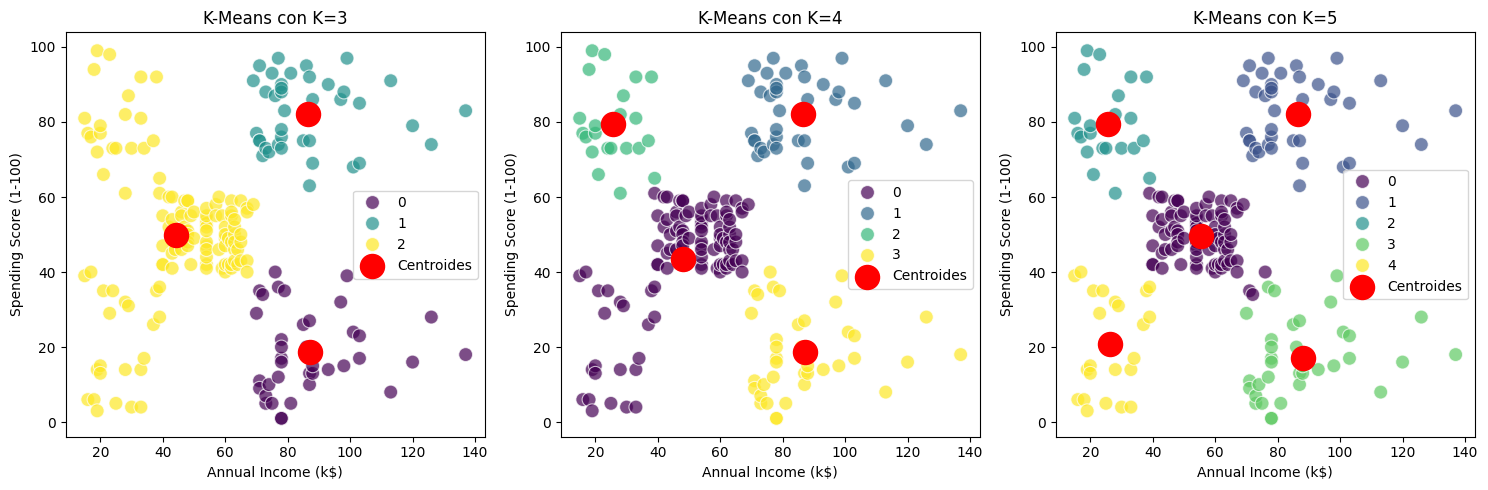

In [18]:
# Probar con K=3, K=4, K=5
k_values = [3, 4, 5]

plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Graficar los clusters
    plt.subplot(1, 3, i)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'K-Means con K={k}')
    plt.legend()

plt.tight_layout()
plt.show()

## Análisis

Si bien aquí se observa diferentes agrupaciones, en cuanto a si los ingresos y puntaje es alto o bajo.

- K=3 la sepración es muy general, pudiendo mezclar clientes que podrían ser distintos, y el objetivo es poder segmentar clientes

- K=4 presenta separaciones más específicas, al punto de sugerirse grupos específicos, pero que parece faltaría separar algo en el grupo 0 (morado)

- K=5 permite capturar diferencias más sutiles entre clientes con ingresos similares

# 4. Elbow Method:

  – Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.


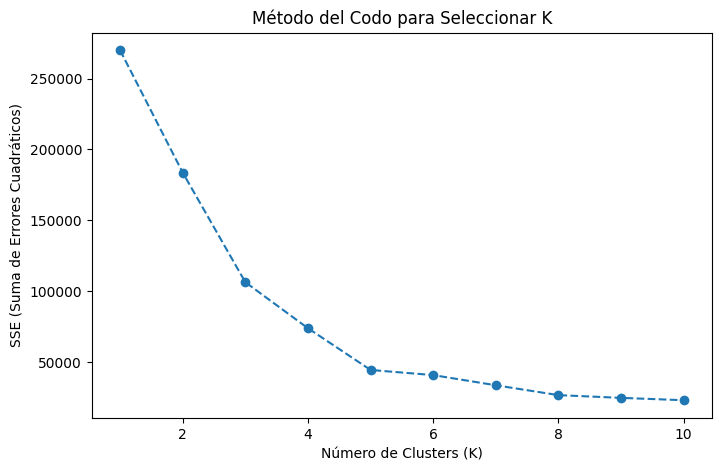

In [15]:
sse = []  # Lista para guardar la Suma de Errores Cuadráticos
k_range = range(1, 11)  # Probamos de K=1 a K=10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Guardamos la inercia

# Graficamos el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE (Suma de Errores Cuadráticos)')
plt.title('Método del Codo para Seleccionar K')
plt.show()


## Análisis

K=5 parece una buena elección, lo que confirma lo que observamos visualmente en los gráficos anteriores.



# 5. Interpretación de Clusters:

  – Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

Centroides:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]




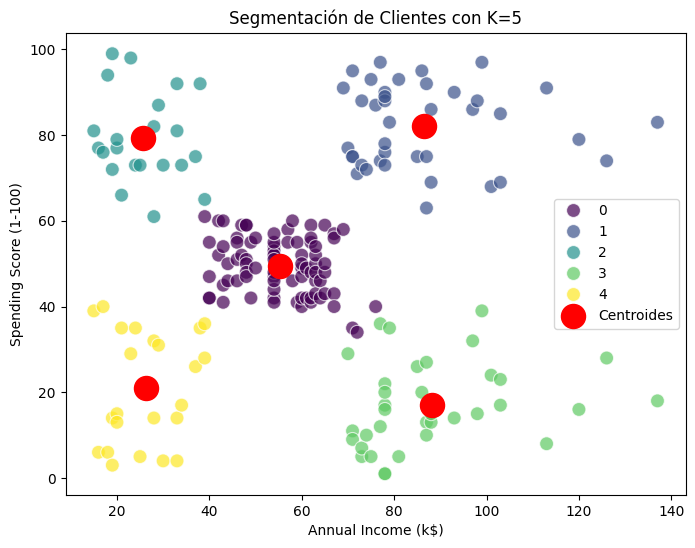

In [17]:
k_optimo = 5  # Supongamos que K=5 es óptimo
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Mostrar los centroides
print("Centroides:\n", kmeans.cluster_centers_)
print("\n")

# Visualizar clusters con el valor óptimo de K
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Segmentación de Clientes con K={k_optimo}')
plt.legend()
plt.show()



## Análisis

Con K=5 uno podría tener por ejemplo:

Clientes con ingresos altos y puntajes de gasto altos → Son clientes VIP que pueden tener algún trato preferencial o promociones exclusivas.

Clientes con ingresos bajos y puntajes de gasto altos → Compradores impulsivos, podrían beneficiarse de descuentos frecuentes e incluso con ofertas para rotación de inventarios.

Clientes con ingresos altos pero puntajes de gasto bajos → Se les podría incentivar a comprar más con programas de fidelización y beneficios de algún tipo (como los servicios "extras" que traen las tarjetas de crédito).

Clientes con ingresos bajos y puntajes de gasto bajos → Probablemente no gasten mucho, pero podrían responder a ofertas especiales, aunque depende de análisis puntuales, por ejemplo fechas especiales o temporadas como tal.

# 6. Análisis de Resultados:

  – Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?

## Análisis

El análisis de segmentación con K-Means ha identificado cinco grupos distintos de clientes con base en su ingreso anual y su spending score.


Análisis de cada Cluster y sus Insights

Cluster 1 (Clientes Promedio) – Centroides: (55.3, 49.5)

- Características: Clientes con un ingreso medio (~ 55k) y un nivel de gasto intermedio (~ 50).
- Patrón: Representan la mayoría de los clientes con un comportamiento estable.
- Insight: Se pueden fidelizar con programas de lealtad y descuentos estratégicos.

Cluster 2 (Clientes Premium o VIP) – Centroides: (86.5, 82.1)

- Características: Alto poder adquisitivo (~ 86k) y alto nivel de gasto (~ 82).
- Patrón: Son clientes que gastan mucho y tienen alta capacidad de compra.
- Insight: Son el segmento más rentable; deben recibir ofertas exclusivas, membresías y experiencias personalizadas.

Cluster 3 (Compradores Frecuentes de Bajos Ingresos) – Centroides: (25.7, 79.3)

- Características: Bajos ingresos (~ 25k) pero alto nivel de gasto (~ 79).
- Patrón: Clientes fieles a pesar de sus ingresos limitados.
- Insight: Se les puede ofrecer facilidades de pago y promociones para mantener su lealtad.

Cluster 4 (Clientes con Potencial de Conversión) – Centroides: (88.2, 17.1)

- Características: Alto ingreso (~ 88k) pero bajo nivel de gasto (~ 17).
- Patrón: Pueden permitirse gastar más, pero no lo hacen actualmente.
- Insight: Es clave implementar estrategias de conversión como campañas de remarketing, recomendaciones personalizadas y promociones especiales.

Cluster 5 (Clientes de Bajo Valor) – Centroides: (26.3, 20.9)

- Características: Bajos ingresos (~ 26k) y bajo gasto (~ 20).
- Patrón: Este grupo representa clientes menos rentables con baja disposición a gastar.
- Insight: Se debe analizar si pueden ser rentabilizados o si es mejor enfocarse en otros segmentos.





# Expansión del Algoritmo y Aplicaciones

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

– Segmentación de Clientes: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.

– Compresión de Imágenes: Reducir el número de colores en una imagen agrupando píxeles similares.

– Agrupación de Documentos: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.
